<a href="https://colab.research.google.com/github/cinmon/endo-detection/blob/main/FINAL_%5B%EC%98%81%EC%83%81%EC%9D%B4%ED%95%B4%5D_Endometriosys_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Endometryosis Detection

In [2]:
import matplotlib.pyplot as plt
# from google.colab import filesIn
import os, shutil
from sklearn.model_selection import train_test_split

This project is utilizing the [GLENDA dataset](https://ftp.itec.aau.at/datasets/GLENDA/).

In particular, it is using:
- 373 pathology-present classes (including annotations).
- 13 438 frames of no pathology.  

In [3]:
!wget -O annotated_classes.zip https://ftp.itec.aau.at/datasets/GLENDA/downloads//Glenda_v1.5_classes.zip
!wget -O no_pathology.zip https://ftp.itec.aau.at/datasets/GLENDA/downloads/GLENDA_v1.5_no_pathology.zip

--2025-06-21 18:53:25--  https://ftp.itec.aau.at/datasets/GLENDA/downloads//Glenda_v1.5_classes.zip
Resolving ftp.itec.aau.at (ftp.itec.aau.at)... 143.205.173.53
Connecting to ftp.itec.aau.at (ftp.itec.aau.at)|143.205.173.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28009709 (27M) [application/zip]
Saving to: ‘annotated_classes.zip’

annotated_classes.z 100%[===================>]  26.71M  6.60MB/s    in 4.8s    

2025-06-21 18:53:31 (5.55 MB/s) - ‘annotated_classes.zip’ saved [28009709/28009709]

--2025-06-21 18:53:31--  https://ftp.itec.aau.at/datasets/GLENDA/downloads/GLENDA_v1.5_no_pathology.zip
Resolving ftp.itec.aau.at (ftp.itec.aau.at)... 143.205.173.53
Connecting to ftp.itec.aau.at (ftp.itec.aau.at)|143.205.173.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 867544435 (827M) [application/zip]
Saving to: ‘no_pathology.zip’

no_pathology.zip    100%[===================>] 827.35M  7.88MB/s    in 86s     

2025-06-21 18:54

In [4]:
!unzip annotated_classes.zip
!unzip no_pathology.zip

Streaming output truncated to the last 5000 lines.
  inflating: no_pathology/frames/v_4044_s_0-253/f_27.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_28.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_29.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_3.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_30.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_31.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_32.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_33.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_34.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_35.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_36.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_37.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_38.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_39.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_4.jpg  
  inflating: no_pathology/frames/v_4044_s_0-253/f_40.jpg  
  infla

## Classification

In [5]:
# 2) Re-organize into train/validation folders for ImageDataGenerator

# original paths
pos_dir = 'Glenda_v1.5_classes/frames'
neg_dir = 'no_pathology/frames'

# new base
base_dir = 'data'
for split in ['train','validation']:
    for cls in ['positive','negative']:
        os.makedirs(os.path.join(base_dir, split, cls), exist_ok=True)

# collect all filepaths
pos_files = [os.path.join(dp, f) for dp,_,fs in os.walk(pos_dir) for f in fs if f.lower().endswith(('.jpg','.png'))]
neg_files = [os.path.join(dp, f) for dp,_,fs in os.walk(neg_dir) for f in fs if f.lower().endswith(('.jpg','.png'))]

# train/val split
pos_tr, pos_val = train_test_split(pos_files, test_size=0.2, random_state=42)
neg_tr, neg_val = train_test_split(neg_files, test_size=0.2, random_state=42)

print(f"Positive train files: {len(pos_tr)}")
print(f"Positive validation files: {len(pos_val)}")
print(f"Negative train files: {len(neg_tr)}")
print(f"Negative validation files: {len(neg_val)}")

# copy
for src_list, split, label in [
    (pos_tr, 'train','positive'),
    (pos_val,'validation','positive'),
    (neg_tr, 'train','negative'),
    (neg_val,'validation','negative'),
]:
    for src in src_list:
        # avoid overwriting
        unique_prefix = os.path.basename(os.path.dirname(src))
        new_name = f"{unique_prefix}_{os.path.basename(src)}"
        dst = os.path.join(base_dir, split, label, new_name)
        shutil.copy2(src, dst)

num_pos_files = sum([len(files) for r, d, files in os.walk('/content/data/train/positive')]) + sum([len(files) for r, d, files in os.walk('/content/data/validation/positive')])
num_neg_files = sum([len(files) for r, d, files in os.walk('/content/data/train/negative')]) + sum([len(files) for r, d, files in os.walk('/content/data/validation/negative')])

print(f"Number of files in /content/data/train/positive + /content/data/validation/positive: {num_pos_files}")
print(f"Number of files in /content/data/train/negative + /content/data/validation/negative: {num_neg_files}")

Positive train files: 298
Positive validation files: 75
Negative train files: 10750
Negative validation files: 2688
Number of files in /content/data/train/positive + /content/data/validation/positive: 373
Number of files in /content/data/train/negative + /content/data/validation/negative: 13438


In [6]:
# 3) Classification pipeline with transfer learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
img_size = (224,224)
batch_size = 32

# data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.0  # we'll use separate dirs
)
train_gen = train_datagen.flow_from_directory(
    os.path.join(base_dir,'train'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_gen = train_datagen.flow_from_directory(
    os.path.join(base_dir,'validation'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 11048 images belonging to 2 classes.
Found 2763 images belonging to 2 classes.


In [8]:
# build model
base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(*img_size,3))
base.trainable = False
clf = Sequential([
    base,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])
clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# callbacks
callbacks = [
    ModelCheckpoint('best_classifier.h5', save_best_only=True, monitor='val_loss'),
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
]

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# train
clf_history = clf.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.9652 - loss: 0.1490

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


346/346 ━━━━━━━━━━━━━━━━━━━━ 216s 555ms/step - accuracy: 0.9652 - loss: 0.1490 - val_accuracy: 0.9729 - val_loss: 0.1272
Epoch 2/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.9736 - loss: 0.1314

346/346 ━━━━━━━━━━━━━━━━━━━━ 173s 500ms/step - accuracy: 0.9736 - loss: 0.1314 - val_accuracy: 0.9729 - val_loss: 0.1247
Epoch 3/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.9721 - loss: 0.1346

346/346 ━━━━━━━━━━━━━━━━━━━━ 199s 492ms/step - accuracy: 0.9721 - loss: 0.1346 - val_accuracy: 0.9729 - val_loss: 0.1247
Epoch 4/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 168s 485ms/step - accuracy: 0.9708 - loss: 0.1391 - val_accuracy: 0.9729 - val_loss: 0.1303
Epoch 5/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 168s 485ms/step - accuracy: 0.9727 - loss: 0.1310 - val_accuracy: 0.9729 - val_loss: 0.1258
Epoch 6/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 175s 506ms/step - accuracy: 0.9732 - loss: 0.1315 - val_accuracy: 0.9729 - val_loss: 0.1302
Epoch 7/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 168s 487ms/step - accuracy: 0.9734 - loss: 0.1292 - val_accuracy: 0.9729 - val_loss: 0.1274
Epoch 8/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 170s 491ms/step - accuracy: 0.9725 - loss: 0.1332 - val_accuracy: 0.9729 - val_loss: 0.1252


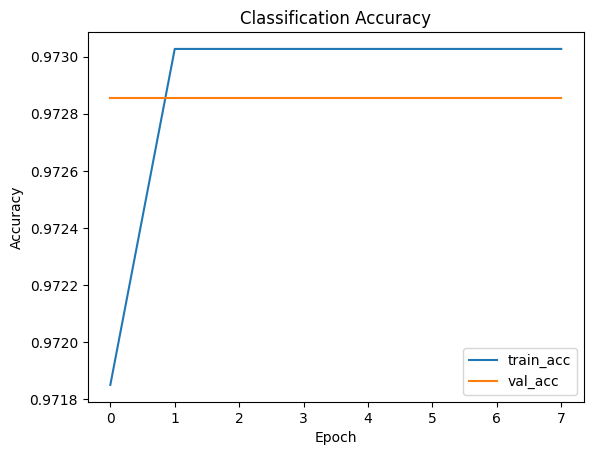

In [10]:
plt.figure()
plt.plot(clf_history.history['accuracy'], label='train_acc')
plt.plot(clf_history.history['val_accuracy'], label='val_acc')
plt.title('Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Same thing, either:
- Validation is so easy that triaining is having a harder time due to data augmentation.
- The training examples are suffering from heavy augmentations (rotations, flips, etc.) that the network still hasn’t mastered.

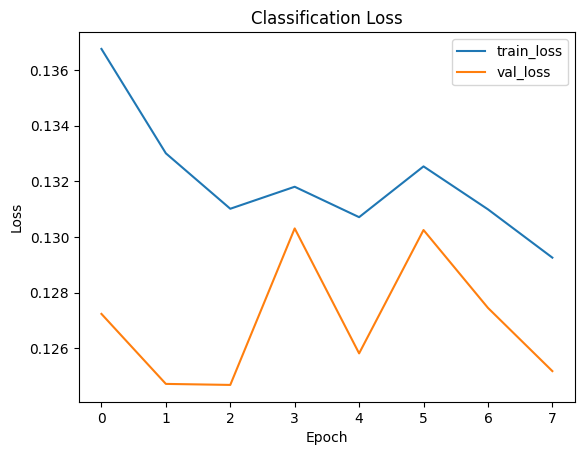

In [11]:
plt.figure()
plt.plot(clf_history.history['loss'], label='train_loss')
plt.plot(clf_history.history['val_loss'], label='val_loss')
plt.title('Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

87/87 ━━━━━━━━━━━━━━━━━━━━ 46s 455ms/step


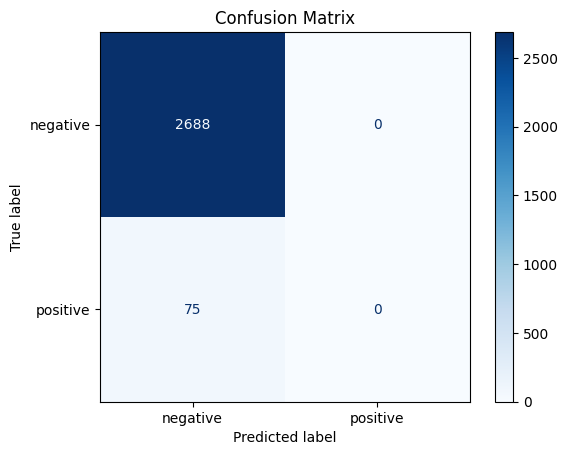

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay

# 1) Gather true labels & predicted probabilities
y_true = val_gen.classes                      # integer labels
y_prob = clf.predict(val_gen)[:, 1]           # prob of class “positive”
y_pred = (y_prob > 0.5).astype(int)

# 2) Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=val_gen.class_indices.keys())
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

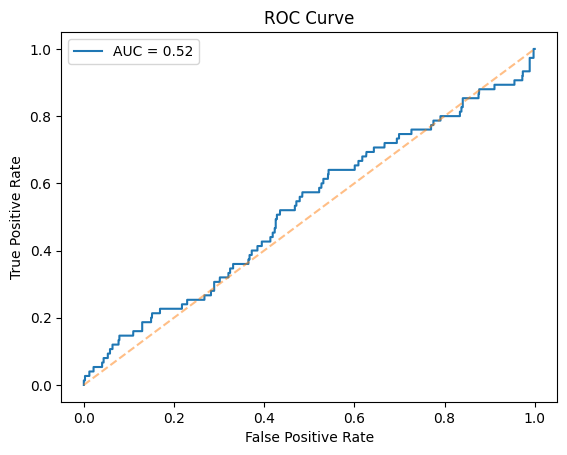

In [13]:
# 3) ROC curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

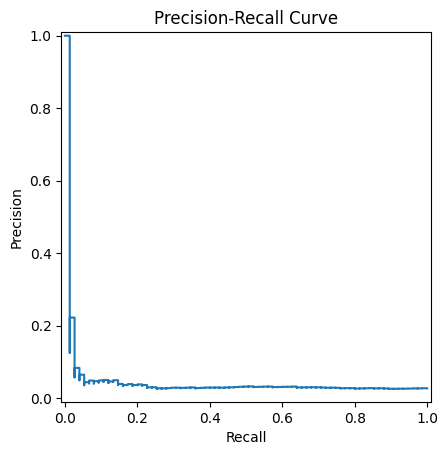

In [14]:
# 4) Precision-Recall curve
prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_display = PrecisionRecallDisplay(precision=prec, recall=rec)
pr_display.plot()
plt.title("Precision-Recall Curve")
plt.show()

## Segmentation

In [15]:
# 4) U-Net segmentation pipeline
import glob
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

# paths
img_paths  = sorted(glob.glob('Glenda_v1.5_classes/frames/**/*.jpg',  recursive=True))
mask_paths = sorted(glob.glob('Glenda_v1.5_classes/annots/**/*.png',  recursive=True))

# split
imgs_tr, imgs_val, msks_tr, msks_val = train_test_split(
    img_paths, mask_paths, test_size=0.2, random_state=42)

In [16]:
# helper funcs
def preprocess(img_path, mask_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, img_size) / 255.0
    m   = tf.io.read_file(mask_path)
    m   = tf.image.decode_png(m, channels=1)
    m   = tf.image.resize(m, img_size) / 255.0
    return img, m

train_ds = tf.data.Dataset.from_tensor_slices((imgs_tr, msks_tr)) \
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(16).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((imgs_val, msks_val)) \
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(16).prefetch(tf.data.AUTOTUNE)

In [17]:
# dice loss
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = tf.reshape(y_true,[-1])
    y_pred_f = tf.reshape(y_pred,[-1])
    inter  = tf.reduce_sum(y_true_f * y_pred_f)
    return (2.*inter + smooth) / (tf.reduce_sum(y_true_f)+tf.reduce_sum(y_pred_f)+smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [18]:
# U-Net model
inputs = Input((*img_size,3))
c1 = Conv2D(64,3,activation='relu',padding='same')(inputs)
p1 = MaxPooling2D()(c1)

c2 = Conv2D(128,3,activation='relu',padding='same')(p1)
p2 = MaxPooling2D()(c2)

c3 = Conv2D(256,3,activation='relu',padding='same')(p2)

u2 = Conv2DTranspose(128,3,strides=2,padding='same')(c3)
u2 = concatenate([u2,c2])
c4 = Conv2D(128,3,activation='relu',padding='same')(u2)

u1 = Conv2DTranspose(64,3,strides=2,padding='same')(c4)
u1 = concatenate([u1,c1])
c5 = Conv2D(64,3,activation='relu',padding='same')(u1)

outputs = Conv2D(1,1,activation='sigmoid')(c5)
unet = Model(inputs, outputs)

unet.compile(optimizer='adam', loss=dice_loss, metrics=[dice_coef])

# segmentation callbacks & train
seg_callbacks = [
    ModelCheckpoint('best_unet.h5', save_best_only=True, monitor='val_loss'),
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
]


In [19]:
seg_history = unet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=seg_callbacks
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - dice_coef: 0.0714 - loss: 0.9286   

19/19 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - dice_coef: 0.0712 - loss: 0.9287 - val_dice_coef: 0.0706 - val_loss: 0.9297
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - dice_coef: 0.0758 - loss: 0.9242

19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - dice_coef: 0.0758 - loss: 0.9242 - val_dice_coef: 0.0779 - val_loss: 0.9202
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - dice_coef: 0.0975 - loss: 0.9024 - val_dice_coef: 0.0768 - val_loss: 0.9236
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - dice_coef: 0.0802 - loss: 0.9198

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - dice_coef: 0.0803 - loss: 0.9197 - val_dice_coef: 0.0947 - val_loss: 0.9043
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - dice_coef: 0.0957 - loss: 0.9042 - val_dice_coef: 3.9950e-05 - val_loss: 1.0000
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - dice_coef: 3.6189e-05 - loss: 1.0000 - val_dice_coef: 3.9950e-05 - val_loss: 1.0000
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - dice_coef: 3.6189e-05 - loss: 1.0000 - val_dice_coef: 3.9950e-05 - val_loss: 1.0000
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - dice_coef: 3.6189e-05 - loss: 1.0000 - val_dice_coef: 3.9950e-05 - val_loss: 1.0000
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - dice_coef: 3.6189e-05 - loss: 1.0000 - val_dice_coef: 3.9950e-05 - val_loss: 1.0000


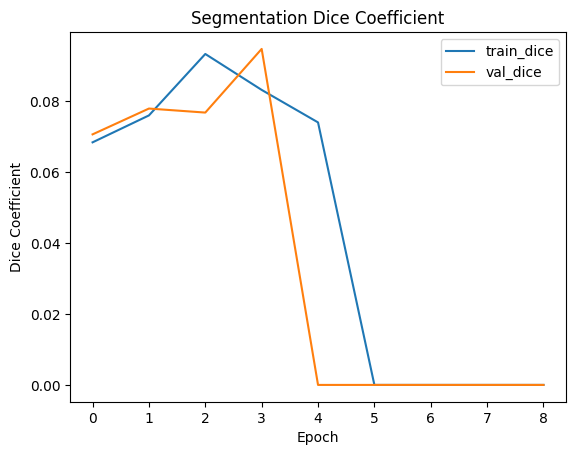

In [20]:
plt.figure()
plt.plot(seg_history.history['dice_coef'], label='train_dice')
plt.plot(seg_history.history['val_dice_coef'], label='val_dice')
plt.title('Segmentation Dice Coefficient')
plt.xlabel('Epoch')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.show()

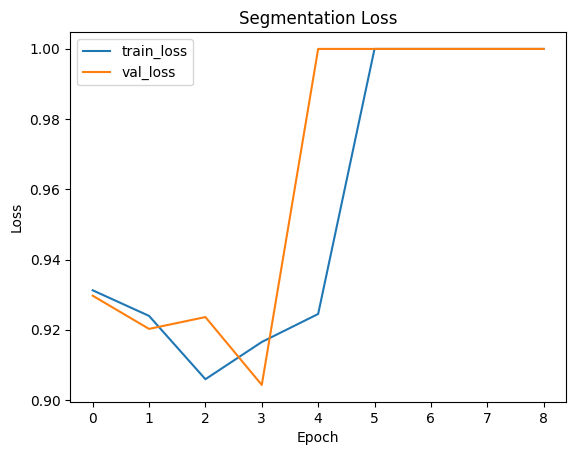

In [21]:
plt.figure()
plt.plot(seg_history.history['loss'], label='train_loss')
plt.plot(seg_history.history['val_loss'], label='val_loss')
plt.title('Segmentation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


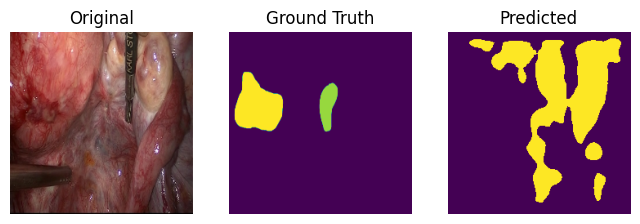

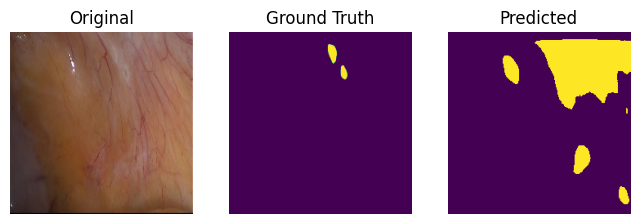

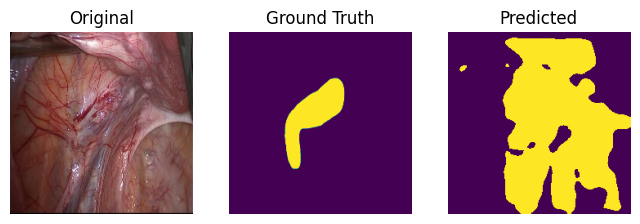

In [22]:
# --- Sample segmentation results ---
num_samples = 3
for images, masks in val_ds.take(1):
    preds = unet.predict(images)
    for i in range(num_samples):
        plt.figure(figsize=(8,4))
        # Original image
        plt.subplot(1,3,1)
        plt.imshow(images[i])
        plt.title('Original')
        plt.axis('off')
        # Ground truth mask
        plt.subplot(1,3,2)
        plt.imshow(masks[i].numpy().squeeze())
        plt.title('Ground Truth')
        plt.axis('off')
        # Predicted mask
        plt.subplot(1,3,3)
        plt.imshow(preds[i].squeeze() > 0.5)
        plt.title('Predicted')
        plt.axis('off')
        plt.show()